In [1]:
# !pip install pandasql

# Practice with Merges

Run the cells below to create the following dataframes.

df_purchases contains information on various customer purchases.

In [2]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import numpy as np

names = ["Jake", "Joe", "Ellen", "Joe", "Ellen"]
item = ["Ball", "Shirt", "Shoes", "Ball", "Shirt"]

df_purchases = pd.DataFrame({"Name": names, "Item_Purchased": item})
                    
df_purchases

,Name,Item_Purchased
0,Jake,Ball
1,Joe,Shirt
2,Ellen,Shoes
3,Joe,Ball
4,Ellen,Shirt


df_items contains information on the prices of each item.

In [3]:
item = ["Ball", "Shirt", "Shoes"]
price = [10, 15, 75]

df_items = pd.DataFrame({"Item": item, "Price":price})

df_items

,Item,Price
0,Ball,10
1,Shirt,15
2,Shoes,75


df_customer contained information on the customers 

In [4]:
customers = ["Jake", "Joe", "Ellen"]
allowance = [15, 12, 85]

df_customers = pd.DataFrame({"Allowance":allowance, "Customers":customers})

df_customers

,Allowance,Customers
0,15,Jake
1,12,Joe
2,85,Ellen


### Question: How many customers went over their allowance?

Create df_1, which is df_purchases with an additional column that gives the price of each item

In [5]:
df_1 = df_purchases.merge(df_items, how = 'inner', left_on = 'Item_Purchased', right_on = 'Item')
df_1 = df_1[['Name', 'Item', 'Price']]
df_1

,Name,Item,Price
0,Jake,Ball,10
1,Joe,Ball,10
2,Joe,Shirt,15
3,Ellen,Shirt,15
4,Ellen,Shoes,75


In [6]:
df_1_sql = sqldf("SELECT A.*, B.Price \
                  FROM df_purchases AS A JOIN df_items AS B \
                  ON A.Item_Purchased = B.Item")
df_1_sql

,Name,Item_Purchased,Price
0,Jake,Ball,10
1,Joe,Shirt,15
2,Ellen,Shoes,75
3,Joe,Ball,10
4,Ellen,Shirt,15


Create df_2, which stores the total amount that each person spent.

In [7]:
df_2 = df_1.groupby('Name')[['Price']].sum().reset_index().rename(columns = {'Price': 'TotalSpent'})
df_2

,Name,TotalSpent
0,Ellen,90
1,Jake,10
2,Joe,25


In [8]:
df_2_sql = sqldf("SELECT Name, SUM(Price) AS TotalSpent \
                  FROM df_1_sql \
                  GROUP BY Name")
df_2_sql

,Name,TotalSpent
0,Ellen,90
1,Jake,10
2,Joe,25


Created df_3, which adds each person't allowance to df_2

In [9]:
df_3 = df_2.merge(df_customers, how = 'inner', left_on = 'Name', right_on = 'Customers').drop(['Customers'], axis = 1)
df_3

,Name,TotalSpent,Allowance
0,Ellen,90,85
1,Jake,10,15
2,Joe,25,12


In [10]:
df_3_sql = sqldf("SELECT A.*, B.Allowance \
                  FROM df_2_sql AS A JOIN df_customers AS B \
                  ON A.Name = B.Customers")
df_3_sql

,Name,TotalSpent,Allowance
0,Ellen,90,85
1,Jake,10,15
2,Joe,25,12


Add a column to df_3 which tells whether or not they went over their allowance or not.

In [11]:
df_3['Deficit'] = df_3.apply(lambda x: 1 if (x['Allowance'] - x['TotalSpent']) < 0 else 0, axis = 1)
df_3

,Name,TotalSpent,Allowance,Deficit
0,Ellen,90,85,1
1,Jake,10,15,0
2,Joe,25,12,1


In [12]:
df_3['Deficit'] = df_3['Allowance'] - df_3['TotalSpent'] < 0
df_3

,Name,TotalSpent,Allowance,Deficit
0,Ellen,90,85,True
1,Jake,10,15,False
2,Joe,25,12,True


Compute how many people went over.

In [13]:
df_3['Deficit'].sum()

2

# Running Back Analysis Tool

The goal in this practice is to analyze the number of rushing yards gained by an inputted running back over the various weeks that the data contains.  We also would like to incorporate whether the given running back went up against good defenses.  To do so, we will compute the average rushing yards given up by each of the given running back's opponents throughout the weeks.


In [14]:
#Place your imports here
import pandas as pd
import matplotlib.pyplot as plt

  Read in the data from the following 4 csv files: nflgames.csv, nflteams.csv, nflplayers.csv, rushingstats.csv. Filter the rushing stats so it only corresponds to running backs (PositionID = 2)

In [15]:
#read in the data below
games = pd.read_csv("data/football_data/nflgames.csv")
teams = pd.read_csv("data/football_data/nflteams.csv")
nflPlayers = pd.read_csv("data/football_data/nflplayers.csv")
rushingStats = pd.read_csv("data/football_data/rushingstats.csv")
rushingStats = rushingStats.loc[rushingStats["PositionID"] == 2, :]

In [16]:
games.head()

,GameID,Week,HomeTeamID,AwayTeamID,HomeScore,AwayScore,DayOfWeek,TimeOfDay,FieldType,Temp,Wind
0,1,1,1,29,16,23,Sun,Day,sportturf,74,8
1,2,2,1,28,26,6,Thu,Night,sportturf,82,6
2,3,3,27,1,21,23,Sun,Day,grass,71,23
3,4,4,1,15,38,10,Sun,Day,sportturf,78,4
4,5,5,7,1,20,13,Sun,Day,fieldturf,0,0


In [17]:
teams.head()

,TeamID,TeamName,TeamCapsAbrv,TeamAbrv
0,1,Baltimore Ravens,RAV,rav
1,2,Denver Broncos,DEN,den
2,3,Oakland Raiders,RAI,rai
3,4,Philadelphia Eagles,PHI,phi
4,5,Dallas Cowboys,DAL,dal


In [18]:
nflPlayers.head()

,PlayerID,PlayerName,PositionID,TeamID
0,1,Kamar Aiken,3,1
1,2,Marlon Brown,3,1
2,3,Jeremy Butler,3,1
3,4,Michael Campanaro,3,1
4,5,Owen Daniels,4,1


In [19]:
rushingStats.head()

,RushingStatsID,PlayerID,PositionID,TeamID,GameID,Att,Yds,Lng,TD,RunShort,RunFive,RunFifteen,RunThirtyPlus,RZInsideTwenty,RZInsideTen,RZInsideFive,RZTD,RZTotal
10,11,7,2,1,1,11,70,13,1,5,7,0,0,1,0,0,1,1
11,12,7,2,1,2,8,56,41,0,6,1,0,1,0,0,2,0,2
12,13,7,2,1,3,11,63,22,0,5,4,2,0,2,0,0,0,2
13,14,7,2,1,4,14,66,21,1,9,4,0,0,3,0,0,1,3
14,15,7,2,1,5,6,42,29,1,4,1,1,0,1,0,0,1,1


Enter the name of the running back you would like to analyze and then find the player's player ID and Team ID.

In [20]:
#Write your code here
name = "LeVeon Bell"

In [21]:
nflPlayers.loc[nflPlayers["PlayerName"] == name]

,PlayerID,PlayerName,PositionID,TeamID
520,521,LeVeon Bell,2,28


Next select the rushing stats corresponding to this player and merge this df with the games df to find the week. In this merged df select the following columns: TeamID, GameID, Yds, Week, HomeTeamID, AwayTeamID. Sort the resulting df by Week.

In [22]:
#Write your code here
df_a = rushingStats.loc[rushingStats['PlayerID'] == 521]
df_a

,RushingStatsID,PlayerID,PositionID,TeamID,GameID,Att,Yds,Lng,TD,RunShort,RunFive,RunFifteen,RunThirtyPlus,RZInsideTwenty,RZInsideTen,RZInsideFive,RZTD,RZTotal
1251,1252,521,2,28,2,11,59,21,0,7,2,2,0,0,0,0,0,0
1252,1253,521,2,28,9,10,20,5,0,7,3,0,0,1,0,0,0,1
1253,1254,521,2,28,62,15,82,29,0,8,6,1,0,0,0,0,0,0
1254,1255,521,2,28,72,24,92,17,0,18,5,1,0,2,1,1,0,4
1255,1256,521,2,28,110,33,204,27,1,13,18,2,0,2,1,1,1,4
1256,1257,521,2,28,114,12,57,20,0,6,5,1,0,0,0,0,0,0
1257,1258,521,2,28,124,21,147,81,0,14,6,0,1,3,1,1,0,5
1258,1259,521,2,28,146,19,63,16,0,14,4,2,0,0,1,0,0,1
1259,1260,521,2,28,169,21,95,18,1,14,5,2,0,1,0,1,1,2
1260,1261,521,2,28,185,11,36,8,0,8,3,0,0,3,0,1,0,4


In [23]:
df_b = df_a.merge(games, how = 'inner', on = 'GameID')
df_b

,RushingStatsID,PlayerID,PositionID,TeamID,GameID,Att,Yds,Lng,TD,RunShort,...,Week,HomeTeamID,AwayTeamID,HomeScore,AwayScore,DayOfWeek,TimeOfDay,FieldType,Temp,Wind
0,1252,521,2,28,2,11,59,21,0,7,...,2,1,28,26,6,Thu,Night,sportturf,82,6
1,1253,521,2,28,9,10,20,5,0,7,...,9,28,1,43,23,Sun,Night,grass,38,6
2,1254,521,2,28,62,15,82,29,0,8,...,5,6,28,9,17,Sun,Day,grass,71,10
3,1255,521,2,28,72,24,92,17,0,18,...,8,28,7,51,34,Sun,Day,grass,62,12
4,1256,521,2,28,110,33,204,27,1,13,...,11,12,28,24,27,Mon,Night,grass,25,9
5,1257,521,2,28,114,12,57,20,0,6,...,7,28,13,30,23,Mon,Night,grass,57,6
6,1258,521,2,28,124,21,147,81,0,14,...,3,15,28,19,37,Sun,Night,grass,79,7
7,1259,521,2,28,146,19,63,16,0,14,...,4,28,19,24,27,Sun,Day,grass,74,3
8,1260,521,2,28,169,21,95,18,1,14,...,13,28,22,32,35,Sun,Day,grass,63,15
9,1261,521,2,28,185,11,36,8,0,8,...,10,26,28,20,13,Sun,Day,fieldturf,58,8


In [24]:
df_c = df_b[['TeamID', 'GameID', 'Yds', 'Week', 'HomeTeamID', 'AwayTeamID']]
df_c = df_c.sort_values(by = 'Week').reset_index(drop = True)
df_c

,TeamID,GameID,Yds,Week,HomeTeamID,AwayTeamID
0,28,186,109,1,28,27
1,28,2,59,2,1,28
2,28,124,147,3,15,28
3,28,146,63,4,28,19
4,28,62,82,5,6,28
5,28,187,82,6,27,28
6,28,114,57,7,28,13
7,28,72,92,8,28,7
8,28,9,20,9,28,1
9,28,185,36,10,26,28


Create a line chart showing the rushing yards per game for this player.

[Text(0.5, 0, 'Week'), Text(0, 0.5, 'Rushing Yards')]

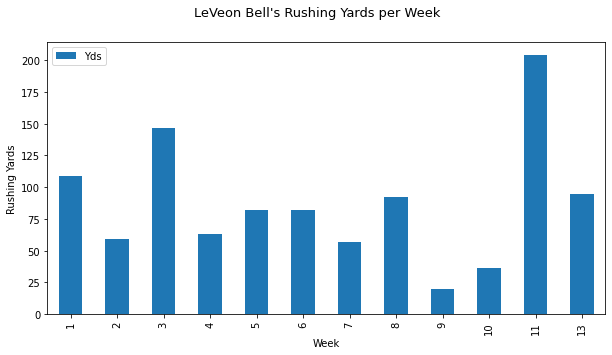

In [25]:
#Create figure and axis
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

#Create a plot
df_c.plot(kind = 'bar', x = 'Week', y = 'Yds', ax = ax)
fig.suptitle("LeVeon Bell's Rushing Yards per Week", size = 13)
ax.set(xlabel = "Week", ylabel = "Rushing Yards")